<a href="https://colab.research.google.com/github/v41bh4v/Qiskit_step_by_step/blob/master/Deutsch_Josza_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install qiskit


     |████████████████████████████████| 6.7MB 2.3MB/s 
     |████████████████████████████████| 23.3MB 63.6MB/s 
     |████████████████████████████████| 163kB 48.9MB/s 
     |████████████████████████████████| 184kB 50.7MB/s 
     |████████████████████████████████| 1.9MB 47.2MB/s 
     |████████████████████████████████| 51kB 6.4MB/s 
     |████████████████████████████████| 5.8MB 42.7MB/s 
     |████████████████████████████████| 51kB 5.9MB/s 
     |████████████████████████████████| 962kB 42.7MB/s 
     |████████████████████████████████| 296kB 44.3MB/s 
     |████████████████████████████████| 71kB 8.8MB/s 
     |████████████████████████████████| 583kB 44.4MB/s 
     |████████████████████████████████| 26.1MB 1.6MB/s 
     |████████████████████████████████| 2.7MB 46.9MB/s 
  Created wheel for qiskit: filename=qiskit-0.19.6-cp36-none-any.whl size=3019 sha256=171e09583d31fc73845c748b9d56add6b91e51adf6dd0673e200a7d3f8c6022c
  Stored in directory: /root/.cache/pip/wheels/35/45/55/8b82d355edf738e

In [7]:
# initialization
import numpy as np

# importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, execute

# import basic plot tools
from qiskit.visualization import plot_histogram

In [8]:
# set the length of the n-bit input string. 
n = 3

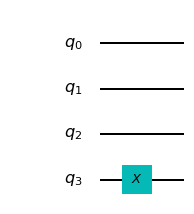

In [26]:
const_oracle = QuantumCircuit(n+1)

output = np.random.randint(2)
if output == 1:
  const_oracle.x(n)

const_oracle.draw('mpl')

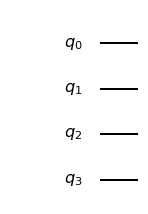

In [27]:
balanced_oracle = QuantumCircuit(n+1)
balanced_oracle.draw('mpl')

In [11]:
# b_str = "101"

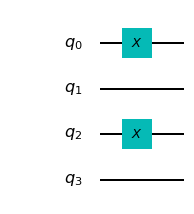

In [12]:
# balanced_oracle = QuantumCircuit(n+1)
# b_str = "101"

# # Place X-gates
# for qubit in range(len(b_str)):
#     if b_str[qubit] == '1':
#         balanced_oracle.x(qubit)
# balanced_oracle.draw('mpl')

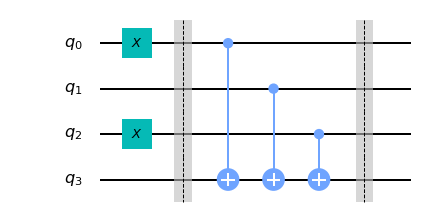

In [13]:
# balanced_oracle = QuantumCircuit(n+1)
# b_str = "101"

# # Place X-gates
# for qubit in range(len(b_str)):
#     if b_str[qubit] == '1':
#         balanced_oracle.x(qubit)

# # Use barrier as divider
# balanced_oracle.barrier()

# # Controlled-NOT gates
# for qubit in range(n):
#     balanced_oracle.cx(qubit, n)

# balanced_oracle.barrier()
# balanced_oracle.draw('mpl')

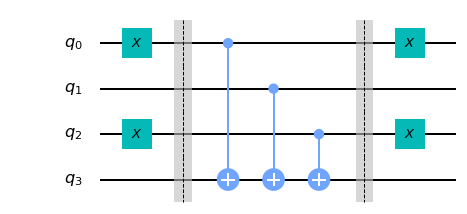

In [28]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Show oracle
balanced_oracle.draw('mpl')

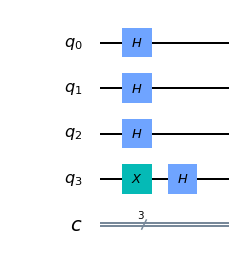

In [30]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)
dj_circuit.draw('mpl')

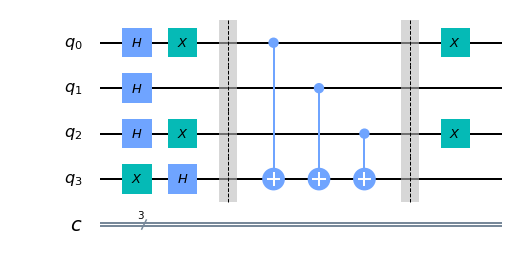

In [32]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

# Add oracle
dj_circuit += balanced_oracle
dj_circuit.draw('mpl')

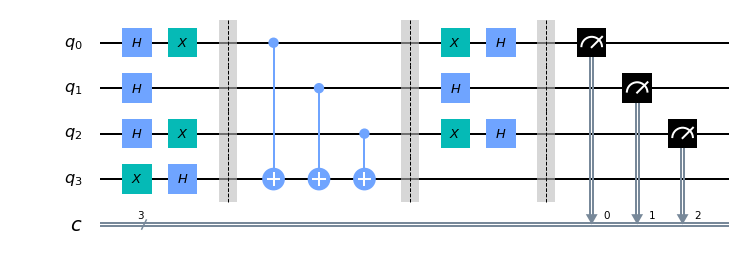

In [33]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

# Add oracle
dj_circuit += balanced_oracle

# Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# Measure
for i in range(n):
    dj_circuit.measure(i, i)

# Display circuit
dj_circuit.draw('mpl')

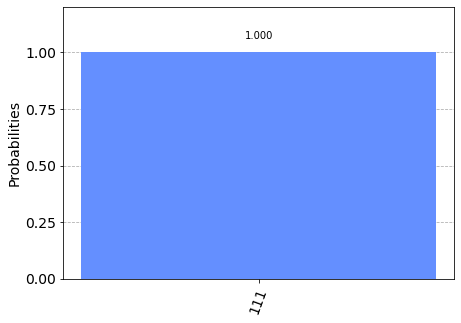

In [34]:
# use local simulator
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(dj_circuit, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

In [35]:
def dj_oracle(case, n):
    # We need to make a QuantumCircuit object to return
    # This circuit has n+1 qubits: the size of the input,
    # plus one output qubit
    oracle_qc = QuantumCircuit(n+1)
    
    # First, let's deal with the case in which oracle is balanced
    if case == "balanced":
        # First generate a random number that tells us which CNOTs to
        # wrap in X-gates:
        b = np.random.randint(1,2**n)
        # Next, format 'b' as a binary string of length 'n', padded with zeros:
        b_str = format(b, '0'+str(n)+'b')
        # Next, we place the first X-gates. Each digit in our binary string 
        # corresponds to a qubit, if the digit is 0, we do nothing, if it's 1
        # we apply an X-gate to that qubit:
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
        # Do the controlled-NOT gates for each qubit, using the output qubit 
        # as the target:
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
        # Next, place the final X-gates
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)

    # Case in which oracle is constant
    if case == "constant":
        # First decide what the fixed output of the oracle will be
        # (either always 0 or always 1)
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)
    
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle" # To show when we display the circuit
    return oracle_gate

In [38]:
def dj_algorithm(oracle, n):
    dj_circuit = QuantumCircuit(n+1, n)
    # Set up the output qubit:
    dj_circuit.x(n)
    dj_circuit.h(n)
    # And set up the input register:
    for qubit in range(n):
        dj_circuit.h(qubit)
    # Let's append the oracle gate to our circuit:
    dj_circuit.append(oracle, range(n+1))
    # Finally, perform the H-gates again and measure:
    for qubit in range(n):
        dj_circuit.h(qubit)
    
    for i in range(n):
        dj_circuit.measure(i, i)
    
    return dj_circuit

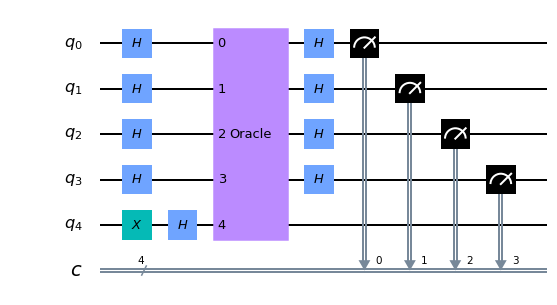

In [40]:
n = 4
oracle_gate = dj_oracle('balanced', n)
dj_circuit = dj_algorithm(oracle_gate, n)
dj_circuit.draw('mpl')

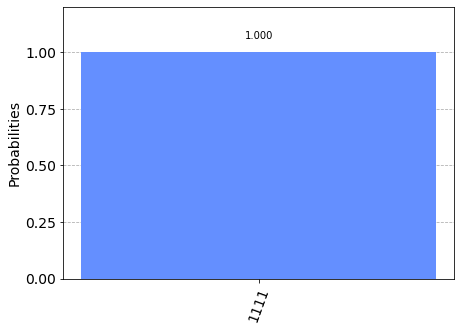

In [41]:
results = execute(dj_circuit, backend=backend, shots=1024).result()
answer = results.get_counts()
plot_histogram(answer)

In [44]:
# Load our saved IBMQ accounts and get the least busy backend device with greater than or equal to (n+1) qubits
IBMQ.save_account('6540e36d3f9476d104af16f52ef0ca6eb678b9936b7e43c48570ac609a034a052e86ddf374a7ee046d4f108244b3a71916c057585b15bcd3923f8560c6a24a13')
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

least busy backend:  ibmq_london


In [45]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

shots = 1024
job = execute(dj_circuit, backend=backend, shots=shots, optimization_level=3)

job_monitor(job, interval = 2)


Job Status: job has successfully run


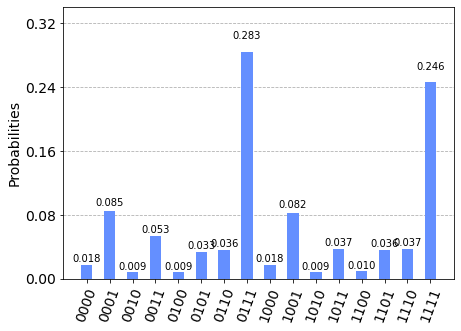

In [46]:
# Get the results of the computation
results = job.result()
answer = results.get_counts()

plot_histogram(answer)